In [1]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

In [2]:
arr = np.array([[1,2,np.nan],[np.nan,3,4]])
arr

array([[ 1.,  2., nan],
       [nan,  3.,  4.]])

In [3]:
dframe1 = DataFrame(arr, index=['A','B'], columns=['One','Two','Three'])
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [4]:
#menghitung total nila dari tiap kolom
#akan meng-ignore null value
dframe1.sum()

One      1.0
Two      5.0
Three    4.0
dtype: float64

In [5]:
#kalau mau menghitung row, ubah axis jadi 1
dframe1.sum(axis=1)

A    3.0
B    7.0
dtype: float64

In [6]:
#min digunakan untuk menghitung minimum dari dframe
dframe1.min()

One      1.0
Two      2.0
Three    4.0
dtype: float64

In [7]:
dframe1.min(axis=1)

A    1.0
B    3.0
dtype: float64

In [8]:
'''
axis=0 all the rows in each column
axis=1 all the columns in each row
'''

'\naxis=0 all the rows in each column\naxis=1 all the columns in each row\n'

In [9]:
#melihat index paling minimal dari tiap kolom
dframe1.idxmin()

One      A
Two      A
Three    B
dtype: object

In [10]:
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [11]:
#melihat jumlah akumulasi dari yang ada 
dframe1.cumsum()
#cuma kelihatan di (B,Two) karena merupakan akumulasi dari 2 ditambah 3

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,5.0,4.0


In [12]:
#dilihat per baris juga bisa
dframe1.cumsum(axis=1)

,One,Two,Three
A,1.0,3.0,NaN
B,NaN,3.0,7.0


In [13]:
##PR: BAGAIMANA CARANYA MEMBUAT BARIS BARU YANG BERISI TOTAL?

In [14]:
#menampilkan statistik deskriptif dari DataFrame yang kita punya
dframe1.describe()

,One,Two,Three
count,1.0,2.000000,1.0
mean,1.0,2.500000,4.0
std,NaN,0.707107,NaN
min,1.0,2.000000,4.0
25%,1.0,2.250000,4.0
50%,1.0,2.500000,4.0
75%,1.0,2.750000,4.0
max,1.0,3.000000,4.0


In [15]:
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [16]:
dframe1.sum()

One      1.0
Two      5.0
Three    4.0
dtype: float64

In [17]:
#Membuat row total
temp_series = Series(dframe1.sum())
temp_series

One      1.0
Two      5.0
Three    4.0
dtype: float64

In [18]:
total_row = DataFrame([temp_series])
total_row

,One,Two,Three
0,1.0,5.0,4.0


In [19]:
dframe2 = dframe1.copy()
dframe2

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [20]:
dframe2 = pd.concat([total_row,dframe2], ignore_index=True)
dframe2

#index ke nol adalah total
#pertanyaan: bagaimana caranya nama index yang tadinya 0 menjadi total?
#sumber: https://kite.com/python/answers/how-to-insert-a-row-into-a-pandas-dataframe

,One,Two,Three
0,1.0,5.0,4.0
1,1.0,2.0,NaN
2,NaN,3.0,4.0


In [21]:
from IPython.display import YouTubeVideo

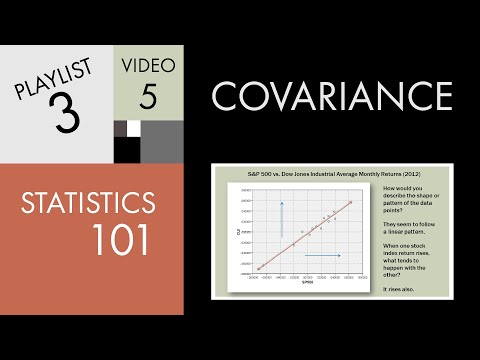

In [22]:
#untuk mengetahui tentang covariance 
YouTubeVideo('xGbpuFNR1ME')

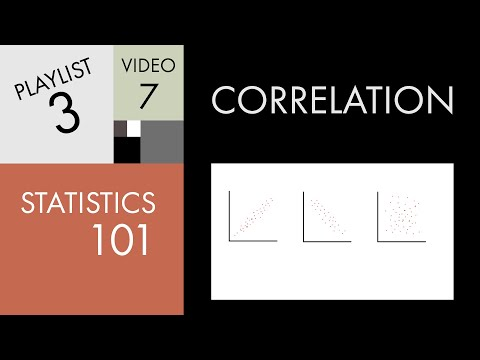

In [23]:
#untuk mengetahui tentang correlation
YouTubeVideo('4EXNedimDMs')

In [27]:
#megambil informasi data dari web lain

#command di bawah ini adalah deprecated
#import pandas.io.data as pdweb

#penggantinya adalah pandas_datareader
import pandas_datareader as pdweb

import datetime

In [41]:
#sepertinya syntax antara pandas.data.io dan pandas_datareader sama
#apakah 'Adj Close'?
#menurut Udemy, Adj Close adalah value yang kita inginkan. Berarti angka yang ada di tabel adalah nilai dari Adj Close
#Adj Close adalah closing price
#start datetime mengambil dari sebelum tanggal yang ditentukan, jadi kalau (2009,12,31) diambil dari 2009-12-30
prices = pdweb.get_data_yahoo(['CVX', 'XOM','BP'], start=datetime.datetime(2009,12,31),
                             end=datetime.datetime(2013,1,1))['Adj Close']
prices.head()

Symbols,BP,CVX,XOM
Date,,,
2009-12-30,34.009270,52.866325,49.071411
2009-12-31,33.898167,52.416977,48.657547
2010-01-04,34.588184,53.826290,49.342556
2010-01-05,34.833763,54.207569,49.535217
2010-01-06,35.015053,54.214378,49.963345


In [33]:
#confirm. jadi ada dua kolom. Pertannyaannya sekarang adalah: bagaimana cara menentukan dua tabel tersebut?
#katanya nanti diajarkan
#REVISIT NANTI (PR) => pelajari DataFrame yang punya tabel lebih dari dua
prices = pdweb.get_data_yahoo(['CVX', 'XOM','BP'], start=datetime.datetime(2010,1,1),
                             end=datetime.datetime(2013,1,1))
prices.head()

Attributes  Adj Close                            Close                        \
Symbols            BP        CVX        XOM         BP        CVX        XOM   
Date                                                                           
2009-12-31  33.898167  52.416977  48.657547  57.970001  76.989998  68.190002   
2010-01-04  34.588184  53.826290  49.342556  59.150002  79.059998  69.150002   
2010-01-05  34.833763  54.207569  49.535217  59.570000  79.620003  69.419998   
2010-01-06  35.015053  54.214378  49.963345  59.880001  79.629997  70.019997   
2010-01-07  35.003349  54.010117  49.806370  59.860001  79.330002  69.800003   

Attributes       High                              Low                        \
Symbols            BP        CVX        XOM         BP        CVX        XOM   
Date                                                                           
2009-12-31  58.490002  77.779999  68.860001  57.970001  76.930000  68.110001   
2010-01-04  59.450001  79.199997  69.260002  59.080002  78.160004  68.190002   
2010-01-05  59.900002  79.620003  69.449997  59.310001  78.720001  68.800003   
2010-01-06  59.919998  80.000000  70.599998  59.340000  79.190002  69.339996   
2010-01-07  60.000000  79.699997  70.059998  59.689999  78.970001  69.419998   

Attributes       Open                           Volume                          
Symbols            BP        CVX        XOM         BP         CVX         XOM  
Date                                                                            
2009-12-31  58.490002  77.720001  68.839996  1517600.0   4246600.0  18852300.0  
2010-01-04  59.299999  78.199997  68.720001  3956100.0  10173800.0  27809100.0  
2010-01-05  59.650002  79.220001  69.190002  4109600.0  10593700.0  30174700.0  
2010-01-06  59.520000  79.440002  69.449997  6227900.0  11014600.0  35044700.0  
2010-01-07  59.919998  79.360001  69.900002  4431300.0   9626900.0  27192100.0

In [35]:
volume = pdweb.get_data_yahoo(['CVX', 'XOM', 'BP'], start=datetime.datetime(2010,1,1), 
                             end=datetime.datetime(2013,1,1))['Volume']

In [36]:
volume.head()

Symbols,BP,CVX,XOM
Date,,,
2009-12-31,1517600.0,4246600.0,18852300.0
2010-01-04,3956100.0,10173800.0,27809100.0
2010-01-05,4109600.0,10593700.0,30174700.0
2010-01-06,6227900.0,11014600.0,35044700.0
2010-01-07,4431300.0,9626900.0,27192100.0


In [48]:
#merupakan return dari stock tsb (?)
#saya tidak begitu mengerti apa itu return 
#tapi returnnya adalah percentage change or percent change
rets = prices.pct_change()

In [49]:
#melihat correlation dari stocks 
corr = rets.corr()

In [50]:
corr

Symbols,BP,CVX,XOM
Symbols,,,
BP,1.000000,0.589669,0.617851
CVX,0.589669,1.000000,0.854919
XOM,0.617851,0.854919,1.000000


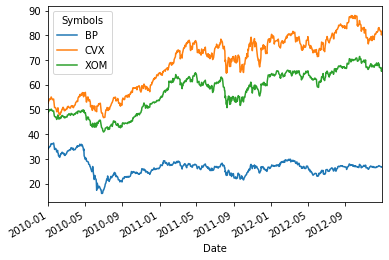

In [42]:
#untuk memanggil matloblib harus menggunakan %matplotlib inline
#price ini adalah price dengan tiga variabel, bukan price dengan banyak variabel yang didefine
#matplotlib tidak perlu didefine?

#menurut sumber, pandas punya method yang didalamnya semacam ada grafik matplotlib sendiri, nama method tsb adalah .plot()
#sumber: http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/understand-df-plot-in-pandas/
%matplotlib inline
prices.plot()

In [43]:
#seaborn adalah library untuk plotting agar membantu kita melakukan visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

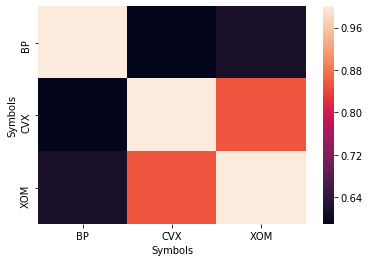

In [54]:
#tadinya pakai method sns.corrplot(rets,annot=False, diag_name=False)
#sns.heatmap(corr) dan sns.heatmap dengan ditambah parameter annot=False tidak ada beda 
sns.heatmap(corr, annot=False)
#terlihat bahwa xom dan cvx memang berkolerasi satu sama lain

In [56]:
ser1 = Series(['w','w','x','y','z','w','x','y','x','a'])
ser1

0    w
1    w
2    x
3    y
4    z
5    w
6    x
7    y
8    x
9    a
dtype: object

In [57]:
#setiap elemen cuma satu, sebelumnya udah pernah diajarin
ser1.unique()

array(['w', 'x', 'y', 'z', 'a'], dtype=object)

In [58]:
#melihat jumlah dari value
#x dan w yang paling banyak
ser1.value_counts()

x    3
w    3
y    2
a    1
z    1
dtype: int64

In [59]:
#mengambil modus dalam bentuk series
ser1.mode()

0    w
1    x
dtype: object